### Preprocess all data from the anatomical session

MPRAGE slab:
1. Calculate warp of acq-slab_inv-1 -> acq_wb-inv-1 (in T1w-space), rigid registration. This is necessary to get the brain mask in slab-space (nighres mp2rage_skullstripping only works on whole-brain images). The inversions (either one) work better than the T1map or T1w image due to the white noise in the latter two
2. Create common template: make mean image, register to this image.

FLASH:
1. Register to MPRAGE-slab (rigid)

In T1w-space of the functional sessions, the brain mask can be used

## MPRAGE slab warp

In [1]:
import nighres
from nighres.registration import embedded_antsreg, apply_coordinate_mappings
from nilearn import plotting
import numpy as np
import nibabel as nib

from glob import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def apply_mask(img, mask):
    """ applies a simple mask to 3D Nifti image, assuming mask is binary [0., 1.]"""
    img_dat = nib.load(img).get_data()
    mask_dat = nib.load(mask).get_data()
    img_dat[mask_dat==0.] = 0.
    
    return nib.Nifti1Image(img_dat, nib.load(img).affine)

In [3]:
work_dir = './anat_session_tmp_files'
if not os.path.exists(work_dir):
    os.makedirs(work_dir)

In [ ]:
for sub in range(1, 19):
    source_image = './data/raw/bids/sub-{sub}/ses-anat/anat/sub-{sub}_ses-anat_acq-slab_inv-1_MPRAGE.nii.gz'.format(**{'sub': str(sub).zfill(2)})
    # inv2 = './data/raw/bids/sub-{sub}/ses-anat/anat/sub-{sub}_ses-anat_acq-slab_inv-2_mprage.nii.gz'.format(**{'sub': str(sub).zfill(2)})
    # T1map = './data/raw/bids/sub-{sub}/ses-anat/anat/sub-{sub}_ses-anat_acq-slab_T1map.nii.gz'.format(**{'sub': str(sub).zfill(2)})
    # T1w = './data/raw/bids/sub-{sub}/ses-anat/anat/sub-{sub}_ses-anat_acq-slab_T1w.nii.gz'.format(**{'sub': str(sub).zfill(2)})

    # find corresponding inv-1 whole-brain image [note that this is the *preprocessed* image, ie skullstripped]
    target_image_brainmask = glob('./data/deriv/fmriprep/sub-{sub}/anat/sub-{sub}_T1w_brainmask.nii.gz'.format(**{'sub': str(sub).zfill(2)}))[0]
    target_image = glob('./data/raw/bids/sub-{sub}/ses-*/anat/sub-{sub}_ses-*_inv-1_MPRAGE.nii'.format(**{'sub': str(sub).zfill(2)}))[0]
    target_image_masked = apply_mask(target_image, target_image_brainmask)
    
    # need to save for nighres
    masked_img_fn = os.path.join(work_dir, 'sub-{sub}_acq-wb_inv-1_masked.nii.gz'.format(**{'sub': str(sub).zfill(2)}))
    nib.save(target_image_masked, masked_img_fn)
    warp_res = embedded_antsreg(source_image, masked_img_fn, run_rigid=True, run_affine=False, run_syn=False, 
                                save_data=True, output_dir=work_dir)


Embedded ANTs Registration

Outputs will be saved to ./anat_session_tmp_files/
skip computation (use existing results)

Embedded ANTs Registration

Outputs will be saved to ./anat_session_tmp_files/
skip computation (use existing results)

Embedded ANTs Registration

Outputs will be saved to ./anat_session_tmp_files/
skip computation (use existing results)

Embedded ANTs Registration

Outputs will be saved to ./anat_session_tmp_files/
skip computation (use existing results)

Embedded ANTs Registration

Outputs will be saved to ./anat_session_tmp_files/
skip computation (use existing results)

Embedded ANTs Registration

Outputs will be saved to ./anat_session_tmp_files/
skip computation (use existing results)

Embedded ANTs Registration

Outputs will be saved to ./anat_session_tmp_files/
skip computation (use existing results)

Embedded ANTs Registration

Outputs will be saved to ./anat_session_tmp_files/

Saving ./anat_session_tmp_files/sub-08_ses-anat_acq-slab_inv-1_MPRAGE_tmp_srcco

In [61]:
warp_res['transformed_source'].affine

array([[ 6.99394226e-01,  2.39134803e-02,  1.63680278e-02,
        -8.85743027e+01],
       [-2.16676649e-02,  6.94084406e-01, -8.81894156e-02,
        -5.78309326e+01],
       [-1.92422830e-02,  8.76071528e-02,  6.94229603e-01,
        -1.43468536e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [55]:

# warp t1w to 


Embedded ANTs Registration

Outputs will be saved to ./data/raw/bids/sub-01/ses-anat/anat/

Saving ./data/raw/bids/sub-01/ses-anat/anat/sub-01_ses-anat_acq-slab_inv-1_MPRAGE_tmp_srccoord.nii.gz

Saving ./data/raw/bids/sub-01/ses-anat/anat/sub-01_ses-anat_acq-slab_inv-1_MPRAGE_tmp_trgcoord.nii.gz
registering ./data/raw/bids/sub-01/ses-anat/anat/sub-01_ses-anat_acq-slab_inv-1_MPRAGE.nii.gz
 to ./tmp.nii.gz
antsRegistration --collapse-output-transforms 1 --dimensionality 3 --initialize-transforms-per-stage 0 --interpolation Linear --output sub-01_ses-anat_acq-slab_inv-1_MPRAGE_tmp_syn --transform Rigid[ 0.1 ] --metric MI[ ./tmp.nii.gz, ./data/raw/bids/sub-01/ses-anat/anat/sub-01_ses-anat_acq-slab_inv-1_MPRAGE.nii.gz, 1, 32, Random, 0.3 ] --convergence [ 1000x1000x1000, 1e-06, 10 ] --smoothing-sigmas 3.0x2.0x1.0 --shrink-factors 4x2x1 --use-histogram-matching 0 --winsorize-image-intensities [ 0.001, 0.999 ]  --write-composite-transform 0


/home/stevenm/miniconda3/lib/python3.7/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


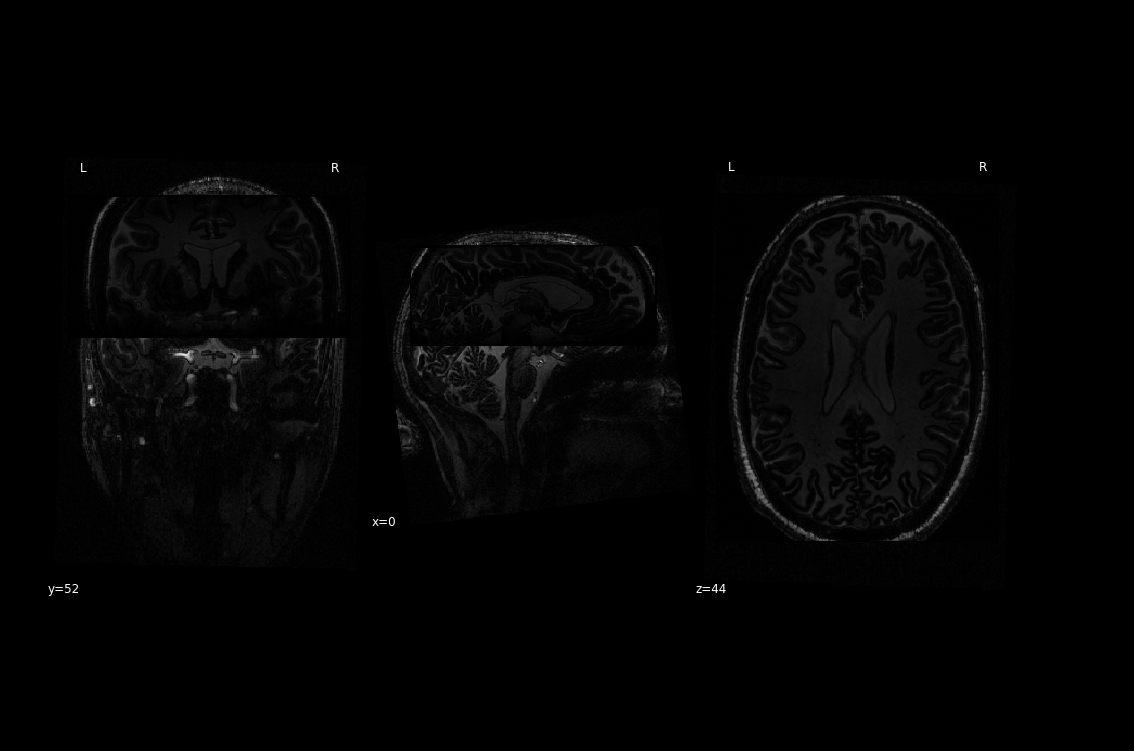

In [57]:
plotting.plot_anat(source_image, bg_img=target_image_masked, draw_cross=False)
plt.gcf().set_size_inches(15,10)

/home/stevenm/miniconda3/lib/python3.7/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


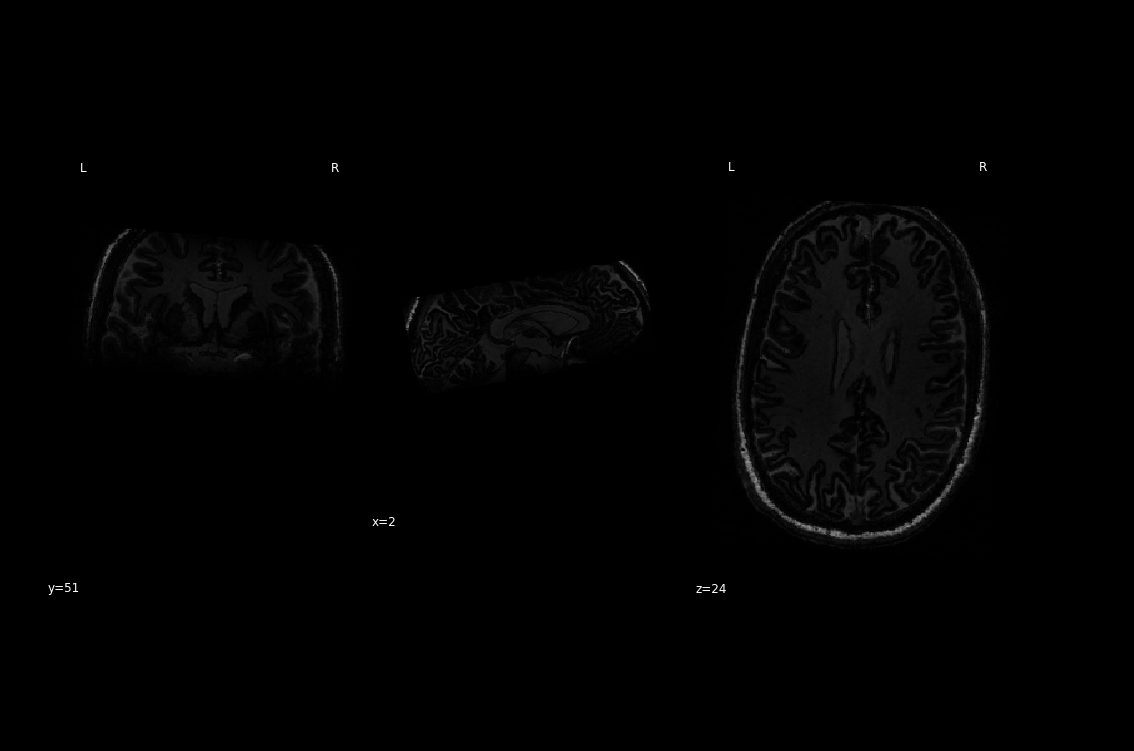

In [58]:
plotting.plot_anat(warp_res['transformed_source'], bg_img=target_image_masked, draw_cross=False)
plt.gcf().set_size_inches(15,10)

In [60]:
nib.save(warp_res['transformed_source'], 'tmp_transformed.nii.gz')

In [62]:
### better approach: make a common template of all pps, and only register that (if necessary)
# still need the warp to get the brain masked mprage images